In [1]:
import sys
sys.path.insert(1, "../python")

import functions as fct
import plotting_functions as pltfct

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import subprocess
from datetime import datetime, timedelta
from scipy import integrate, optimize
import scienceplots

plt.style.use(['science', 'notebook', 'grid'])

In [3]:
df = fct.read_df('../../04_output_data/superdf_old_nodes.csv')
df = fct.power_percentile_mean(df)

dpi = 500

<Figure size 800x600 with 0 Axes>

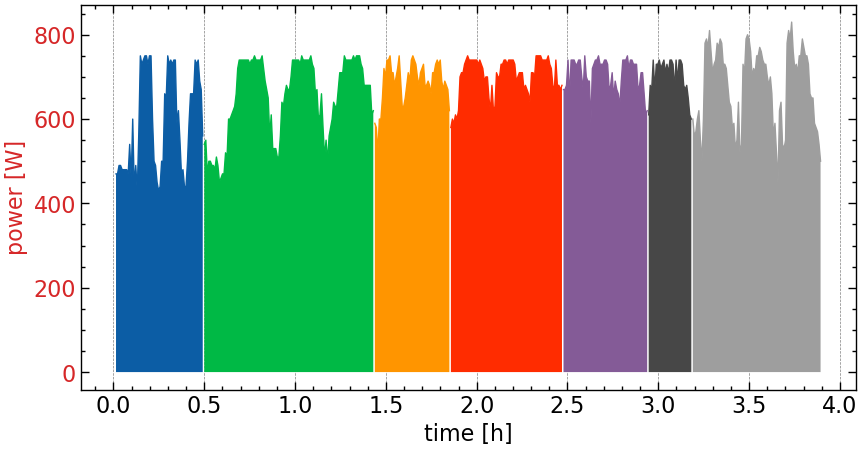

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

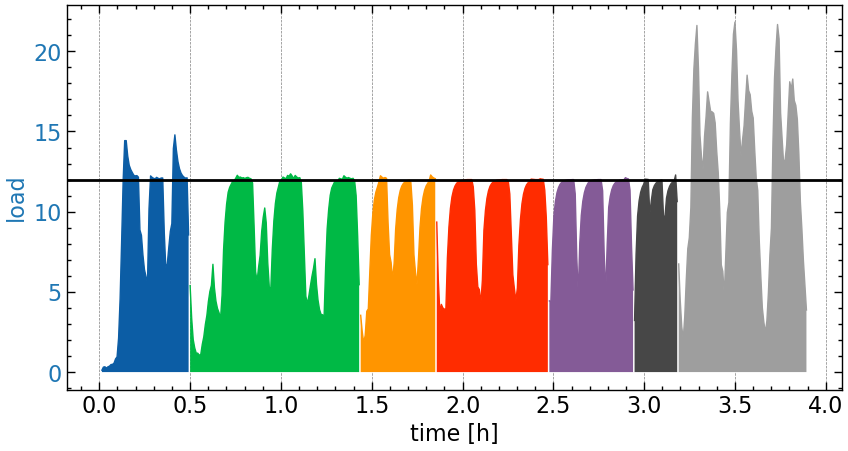

In [4]:
pltfct.plot_lifeline_separate('1310_2100', 'n4507', fontsize=15, ncol=4,
                              #savefig=['../../05_plots/power_time_on.png', '../../05_plots/load_time_on.png', '../../05_plots/x_time_legend_on.png']
                              )

## Plots concerning the vCore variation of the nodes equipped with the Intel CPUs

/home/lucas/Uni/Bachelor/Bachelorarbeit/02_code/notebooks/../python/plotting_functions.py:265: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['PS'] = temp_df['PS'].to_numpy() / 4
/home/lucas/Uni/Bachelor/Bachelorarbeit/02_code/notebooks/../python/plotting_functions.py:266: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['ppm'] = temp_df['ppm'].to_numpy() / 4


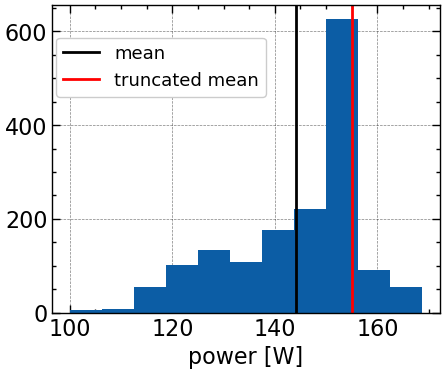

/home/lucas/Uni/Bachelor/Bachelorarbeit/02_code/notebooks/../python/plotting_functions.py:265: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['PS'] = temp_df['PS'].to_numpy() / 4
/home/lucas/Uni/Bachelor/Bachelorarbeit/02_code/notebooks/../python/plotting_functions.py:266: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['ppm'] = temp_df['ppm'].to_numpy() / 4


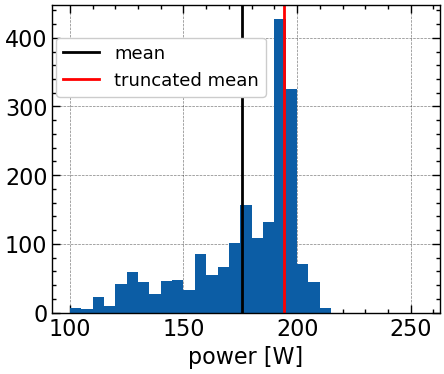

/home/lucas/Uni/Bachelor/Bachelorarbeit/02_code/notebooks/../python/plotting_functions.py:265: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['PS'] = temp_df['PS'].to_numpy() / 4
/home/lucas/Uni/Bachelor/Bachelorarbeit/02_code/notebooks/../python/plotting_functions.py:266: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['ppm'] = temp_df['ppm'].to_numpy() / 4


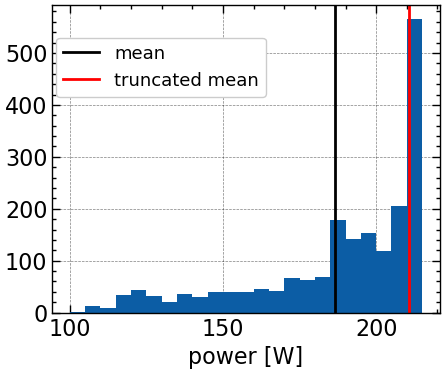

/home/lucas/Uni/Bachelor/Bachelorarbeit/02_code/notebooks/../python/plotting_functions.py:265: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['PS'] = temp_df['PS'].to_numpy() / 4
/home/lucas/Uni/Bachelor/Bachelorarbeit/02_code/notebooks/../python/plotting_functions.py:266: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['ppm'] = temp_df['ppm'].to_numpy() / 4


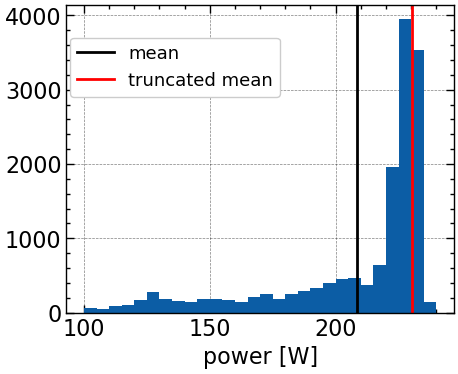

In [5]:
pltfct.plot_power_hist(['ncores', 4], df[df['freq'] == 2400], 
                       #savefig='../../05_plots/power_hist_on_4_ncores.png'
                       )
pltfct.plot_power_hist(['ncores', 16], df[df['freq'] == 2400], 
                       #savefig='../../05_plots/power_hist_on_16_ncores.png',
                       binwidth=5)
pltfct.plot_power_hist(['ncores', 20], df[df['freq'] == 2400], 
                       #savefig='../../05_plots/power_hist_on_20_ncores.png', 
                       binwidth=5)
pltfct.plot_power_hist(['ncores', 40], df[df['freq'] == 2400], 
                       #savefig='../../05_plots/power_hist_on_40_ncores.png', 
                       binwidth=5)

8.0 8.0


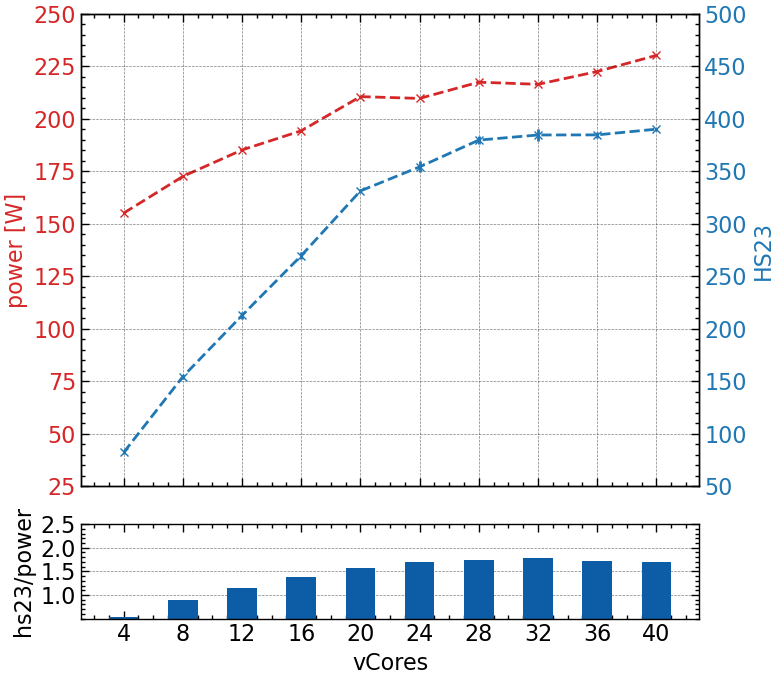

In [6]:
ncores, power, power_err, hs, hs_err, runtime, runtime_err = fct.data_to_numpy(df[df['freq'] == 2400], mode='ncores', per_vcore=False)

fig, (ax1, ax3) = plt.subplots(2, 1, sharex=True, height_ratios=np.array([5, 1]))

color = 'tab:red'
ax1.set_ylabel('power [W]', color=color)
ax1.errorbar(ncores, power, color=color, yerr=power_err, fmt='x--')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('HS23', color=color)
ax2.errorbar(ncores, hs, color=color, yerr=hs_err, fmt='x--')
ax2.tick_params(axis='y', labelcolor=color)

ax3.set_xlabel('vCores')
ax3.bar(ncores, hs/power, width=np.zeros(len(ncores)) + 2)
ax3.set_xticks([8, 16, 24, 32, 40])
ax3.set_yticks([1., 1.5, 2., 2.5])
ax3.set_ylim(0.5, 2.5)
ax3.set_ylabel('hs23/power')

ax1.grid(axis='y')
ax3.grid(axis='x')
ax3.set_xticks(np.arange(4, 41, 4))

ax1.set_ylim(100/4, 1000/4)
ax2.set_ylim(200/4, 2000/4)


print(fig.get_figwidth(), fig.get_figwidth())
fig.set_figheight(7)
fig.set_figwidth(8)
fig.tight_layout()

plt.show()
#plt.savefig('../../05_plots/power_hs_on_ncores.png', dpi=dpi, transparent=True)

8.0 8.0


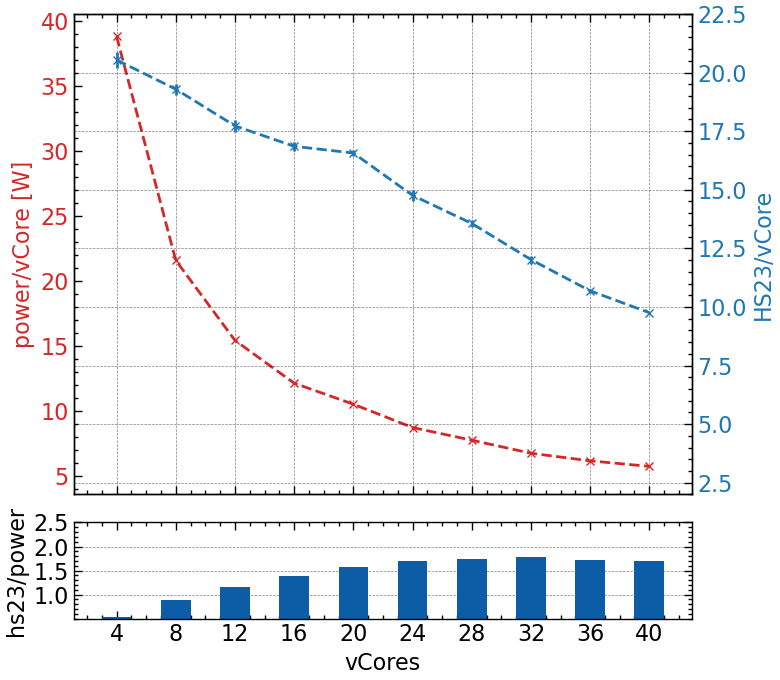

In [7]:
power, power_err, hs, hs_err = fct.data_to_numpy(df[df['freq'] == 2400], mode='ncores')[1:5]


fig, (ax1, ax3) = plt.subplots(2, 1, sharex=True, height_ratios=np.array([5, 1]))

color = 'tab:red'
ax1.set_ylabel('power/vCore [W]', color=color)
ax1.errorbar(ncores, power, color=color, yerr=power_err, fmt='x--')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('HS23/vCore', color=color)
ax2.errorbar(ncores, hs, color=color, yerr=hs_err, fmt='x--')
ax2.tick_params(axis='y', labelcolor=color)

ax3.set_xlabel('vCores')
ax3.bar(ncores, hs/power, width=np.zeros(len(ncores)) + 2)
ax3.set_xticks([8, 16, 24, 32, 40])
ax3.set_yticks([1., 1.5, 2., 2.5])
ax3.set_ylim(0.5, 2.5)
ax3.set_ylabel('hs23/power')

ax1.grid(axis='y')
ax3.grid(axis='x')
ax3.set_xticks(np.arange(4, 41, 4))

ax1.set_ylim(np.array([2, 22.5])*1.8)
ax2.set_ylim(2, 22.5)


print(fig.get_figwidth(), fig.get_figwidth())
fig.set_figheight(7)
fig.set_figwidth(8)
fig.tight_layout()

plt.show()
#plt.savefig('../../05_plots/power_hs_per_vcore_on_ncores.png', dpi=dpi, transparent=True)

## Plots concerning the frequency variation of the nodes equipped with the Intel CPUs

/home/lucas/Uni/Bachelor/Bachelorarbeit/02_code/notebooks/../python/plotting_functions.py:265: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['PS'] = temp_df['PS'].to_numpy() / 4
/home/lucas/Uni/Bachelor/Bachelorarbeit/02_code/notebooks/../python/plotting_functions.py:266: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['ppm'] = temp_df['ppm'].to_numpy() / 4


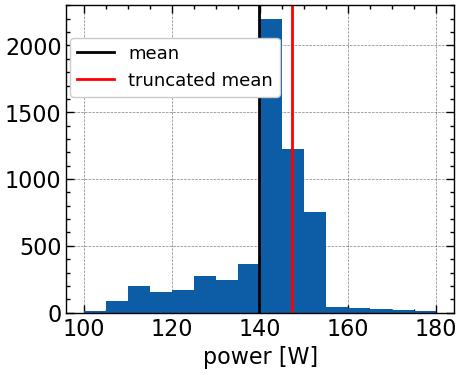

/home/lucas/Uni/Bachelor/Bachelorarbeit/02_code/notebooks/../python/plotting_functions.py:265: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['PS'] = temp_df['PS'].to_numpy() / 4
/home/lucas/Uni/Bachelor/Bachelorarbeit/02_code/notebooks/../python/plotting_functions.py:266: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['ppm'] = temp_df['ppm'].to_numpy() / 4


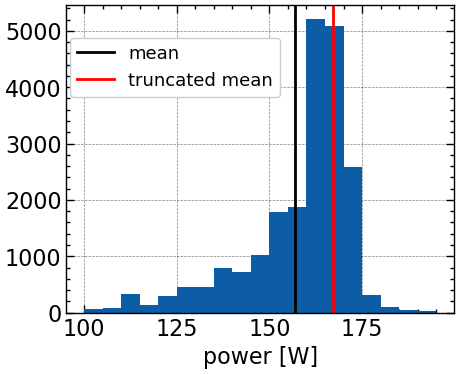

/home/lucas/Uni/Bachelor/Bachelorarbeit/02_code/notebooks/../python/plotting_functions.py:265: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['PS'] = temp_df['PS'].to_numpy() / 4
/home/lucas/Uni/Bachelor/Bachelorarbeit/02_code/notebooks/../python/plotting_functions.py:266: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['ppm'] = temp_df['ppm'].to_numpy() / 4


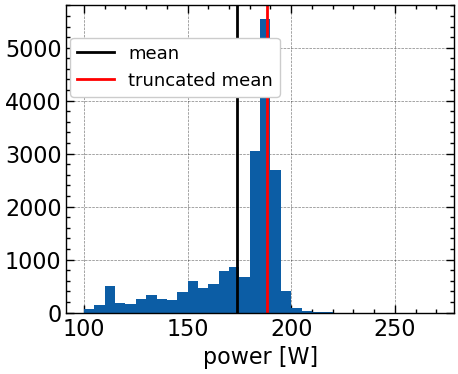

/home/lucas/Uni/Bachelor/Bachelorarbeit/02_code/notebooks/../python/plotting_functions.py:265: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['PS'] = temp_df['PS'].to_numpy() / 4
/home/lucas/Uni/Bachelor/Bachelorarbeit/02_code/notebooks/../python/plotting_functions.py:266: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['ppm'] = temp_df['ppm'].to_numpy() / 4


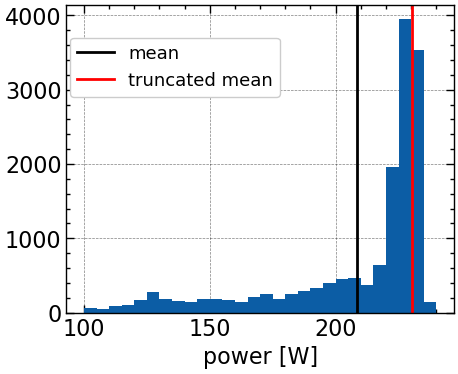

In [8]:
pltfct.plot_power_hist(['freq', 1200], df[df['ncores'] == 40], 
                       #savefig='../../05_plots/power_hist_on_1200MHz.png', 
                       binwidth=5)
pltfct.plot_power_hist(['freq', 1600], df[df['ncores'] == 40], 
                       #savefig='../../05_plots/power_hist_on_1600MHz.png', 
                       binwidth=5)
pltfct.plot_power_hist(['freq', 2000], df[df['ncores'] == 40], 
                       #savefig='../../05_plots/power_hist_on_2000MHz.png', 
                       binwidth=5)
pltfct.plot_power_hist(['freq', 2400], df[df['ncores'] == 40], 
                       #savefig='../../05_plots/power_hist_on_2400MHz.png', 
                       binwidth=5)


8.0 8.0


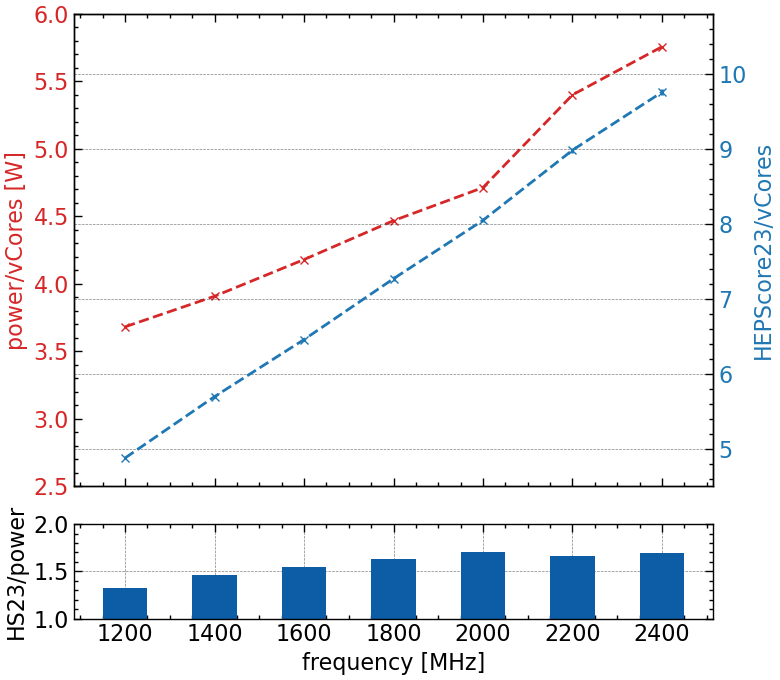

In [9]:
frequency, power, power_err, hs, hs_err, runtime, runtime_err  = fct.data_to_numpy(df[df['ncores'] == 40], mode='freq')


fig, (ax1, ax3) = plt.subplots(2, 1, sharex=True, height_ratios=np.array([5, 1]))

color = 'tab:red'
ax1.set_ylabel('power/vCores [W]', color=color)
ax1.errorbar(frequency, power, color=color, yerr=power_err, fmt='x--')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('HEPScore23/vCores', color=color)
ax2.errorbar(frequency, hs, color=color, yerr=hs_err, fmt='x--')
ax2.tick_params(axis='y', labelcolor=color)

ax3.set_xlabel('frequency [MHz]')
ax3.bar(frequency, hs/power, width=np.zeros(len(frequency)) + 100)
ax3.set_yticks([1., 1.5, 2., 2.5])
ax3.set_ylim(1, 2)
ax3.set_ylabel('HS23/power')

ax1.grid()
ax3.set_xticks(np.arange(1200, 2401, 200))


lim = np.array([2.5, 6])

ax1.set_ylim(lim)
ax2.set_ylim(lim*1.8)

print(fig.get_figwidth(), fig.get_figwidth())
fig.set_figheight(7)
fig.set_figwidth(8)
fig.tight_layout()

plt.show()
#plt.savefig('../../05_plots/power_hs_on_freq.png', dpi=100, transparent=True)

## Analysis of runtimes

In [10]:
def individual_runtimes(df):
    runs = list(set(df['run']))
    nodes = list(set(df['node']))
    bmks = pltfct.benchmarks()
    dic = {'ncores' : np.array([]),
        'freq' : np.array([]),
        'bmk' : np.array([]),
        'duration' : np.array([])
        }

    for run in runs:
        for node in nodes:
            ncores = df[(df['run'] == run) & (df['node'] == node)]['ncores'].mean()
            freq = df[(df['run'] == run) & (df['node'] == node)]['freq'].mean()
            bmk_runtimes = pltfct.get_runtimes_individual_bmks_ncores(run, node)
            for i in range(len(bmks) - 1):
                duration = fct.seconds_to_hours((bmk_runtimes[bmks[i + 1]] - bmk_runtimes[bmks[i]]).total_seconds())

                dic['ncores'] = np.append(dic['ncores'], ncores)
                dic['freq'] = np.append(dic['freq'], freq)
                dic['bmk'] = np.append(dic['bmk'], bmks[i])
                dic['duration'] = np.append(dic['duration'], duration)
            

            duration = fct.seconds_to_hours((bmk_runtimes['ende'] - bmk_runtimes[bmks[-1]]).total_seconds())

            dic['ncores'] = np.append(dic['ncores'], ncores)
            dic['freq'] = np.append(dic['freq'], freq)
            dic['bmk'] = np.append(dic['bmk'], bmks[-1])
            dic['duration'] = np.append(dic['duration'], duration)
                

    return pd.DataFrame(dic)

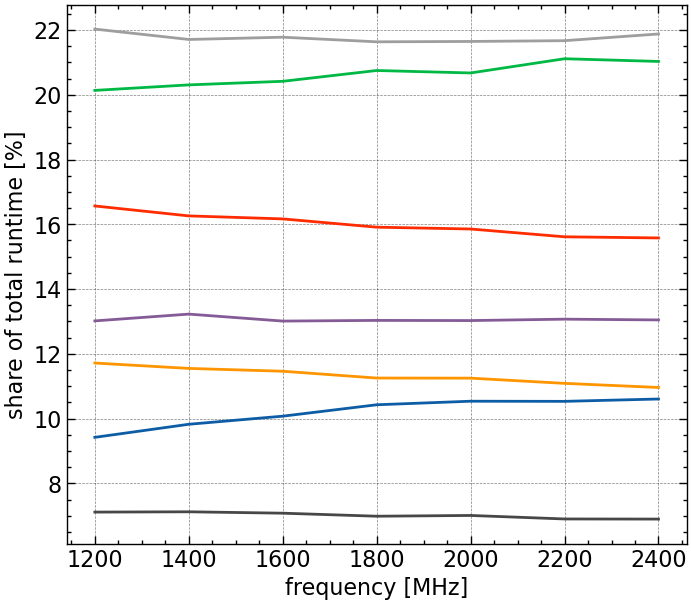

<Figure size 300x200 with 0 Axes>

In [11]:
frequency, power, power_err, hs, hs_err, runtime, runtime_err  = fct.data_to_numpy(df[df['ncores'] == 40], mode='freq')


individual_bmks_runtimes = individual_runtimes(df[df['ncores'] == 40])
bmks = pltfct.benchmarks()

fig, ax = plt.subplots()
axes = {}
labels = {}
for bmk in bmks:
    label = bmk.split('-ma-')[0].split('-run3')[0]
    axes[bmk], = ax.plot(individual_bmks_runtimes[individual_bmks_runtimes['bmk'] == bmk].groupby(['freq'])['freq'].mean().to_numpy(),
             (individual_bmks_runtimes[individual_bmks_runtimes['bmk'] == bmk].groupby(['freq'])['duration'].mean().to_numpy() / runtime) * 100,
             label=label)
    labels[bmk] = label

ax.set_xlabel('frequency [MHz]')
ax.set_ylabel('share of total runtime [%]')

fig.set_figwidth(8)
fig.set_figheight(7)

plt.show()
#plt.savefig('../../05_plots/runtime_shares_on_freq.png', dpi=100)

## saves the legend in an extra file

fig_legend = plt.figure(figsize=(3, 2))
legend = fig_legend.legend(handles=[axes[bmk] for bmk in bmks], labels=[labels[bmk] for bmk in bmks], loc='center', ncol=4)
plt.show()
#plt.savefig('../../05_plots/runtime_shares_on_legend.png', dpi=dpi)

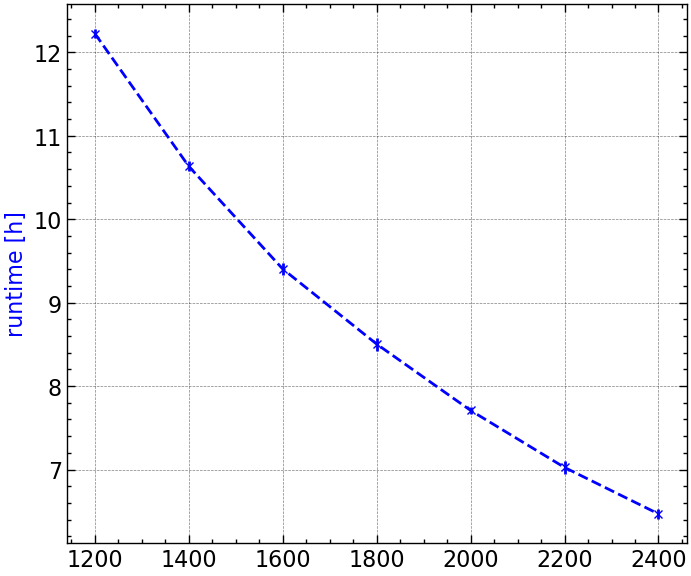

In [12]:
fig, ax = plt.subplots(1,1)

fig.set_figwidth(8)
fig.set_figheight(7)

ax.errorbar(frequency, runtime, fmt='bx--', yerr=runtime_err)
ax.set_ylabel('runtime [h]', color='b')

fig.set_figwidth(8)
fig.set_figheight(7)

plt.show()
#plt.savefig('../../05_plots/runtimes_on_freq.png', dpi=dpi, transparent=True)

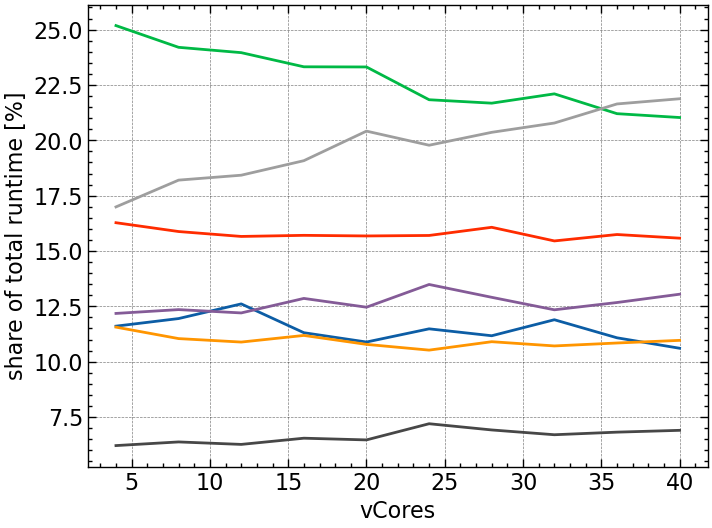

In [13]:
ncores, power, power_err, hs, hs_err, runtime, runtime_err = fct.data_to_numpy(df[df['freq'] == 2400], mode='ncores', per_vcore=False)


individual_bmks_runtimes = individual_runtimes(df[df['freq'] == 2400])
bmks = pltfct.benchmarks()

for bmk in bmks:
    label = bmk.split('-ma-')[0].split('-run3')[0]
    plt.plot(individual_bmks_runtimes[individual_bmks_runtimes['bmk'] == bmk].groupby(['ncores'])['ncores'].mean().to_numpy(),
             (individual_bmks_runtimes[individual_bmks_runtimes['bmk'] == bmk].groupby(['ncores'])['duration'].mean().to_numpy() / runtime) * 100,
             label=label)
plt.xlabel('vCores')
plt.ylabel('share of total runtime [%]')

fig.set_figwidth(8)
fig.set_figheight(7)

plt.show()
#plt.savefig('../../05_plots/runtime_shares_on_ncores.png', dpi=dpi)

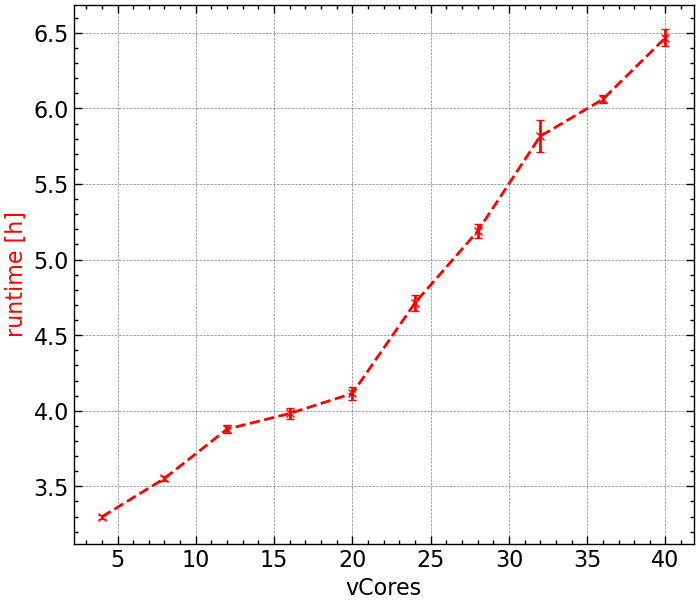

In [14]:
fig, ax = plt.subplots()

ax.errorbar(ncores, runtime, yerr=runtime_err, fmt='rx--', capsize=3)

ax.set_xlabel('vCores')
ax.set_ylabel('runtime [h]', color='r')

fig.set_figheight(7)
fig.set_figwidth(8)
plt.show()
#plt.savefig('../../05_plots/runtimes_on_ncores.png', dpi=dpi, transparent=True)